In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [9]:

df = pd.read_csv("Mall_Customers.csv") 


In [10]:

features = df[["Annual Income (k$)", "Spending Score (1-100)"]]



In [11]:

features = features.dropna()


In [12]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


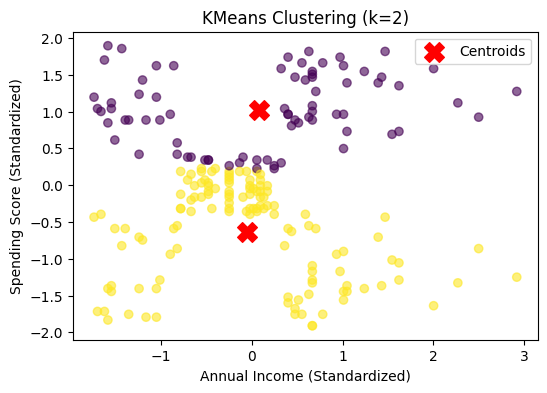

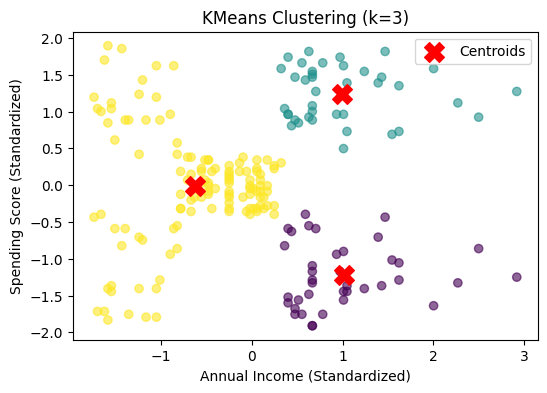

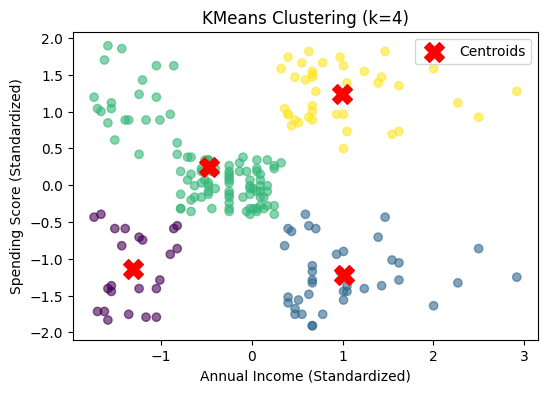

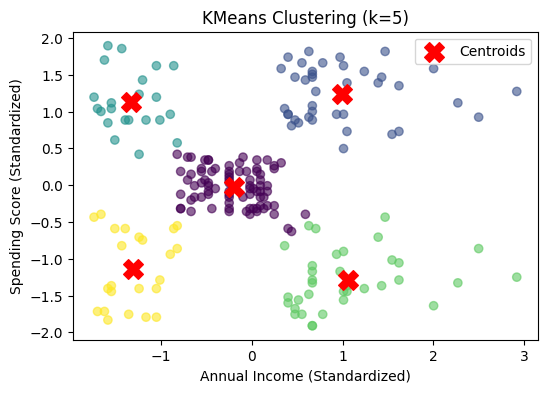

In [13]:

silhouette_scores = {}
for k in range(2, 6): 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores[k] = score
    plt.figure(figsize=(6, 4))
    plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel("Annual Income (Standardized)")
    plt.ylabel("Spending Score (Standardized)")
    plt.title(f"KMeans Clustering (k={k})")
    plt.legend()
    plt.show()


In [14]:

for k, score in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {score:.4f}")


Silhouette Score for k=2: 0.3213
Silhouette Score for k=3: 0.4666
Silhouette Score for k=4: 0.4939
Silhouette Score for k=5: 0.5547


In [15]:

optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"The optimal number of clusters is {optimal_k} with a silhouette score of {silhouette_scores[optimal_k]:.4f}")


The optimal number of clusters is 5 with a silhouette score of 0.5547
